In [1]:
# importing libraries

import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import IFrame, display

In [2]:
# importing dataset

df = pd.read_csv('new_york_data.csv', index_col = 0)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge
0,11AA3AB3ED9FEFC5,classic_bike,2022-01-01 00:10:20,2022-01-01 00:19:29,Riverview Park,JC057,Riverview Park,JC057,40.744319,-74.043991,40.744319,-74.043991,casual,2022-01-01,11.6,both
1,554FD61E00599BE2,electric_bike,2022-01-01 00:10:24,2022-01-01 00:14:06,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,2022-01-01,11.6,both
2,4D3D324F756B7103,electric_bike,2022-01-01 00:10:28,2022-01-01 00:14:12,Sip Ave,JC056,Glenwood Ave,JC094,40.730897,-74.063913,40.727551,-74.071061,member,2022-01-01,11.6,both
3,E26BB19DBC834216,classic_bike,2022-01-01 00:10:30,2022-01-01 00:24:30,Grove St PATH,JC005,Newport Pkwy,JC008,40.719586,-74.043117,40.728745,-74.032108,member,2022-01-01,11.6,both
4,DC18B042AA415411,classic_bike,2022-01-01 00:11:31,2022-01-01 00:30:43,Columbus Dr at Exchange Pl,JC106,Columbus Dr at Exchange Pl,JC106,40.716870,-74.032810,40.716870,-74.032810,casual,2022-01-01,11.6,both


In [4]:
# checking for blank station start and ends

df[['start_station_name', 'end_station_name']].isna().sum()

start_station_name      10
end_station_name      3204
dtype: int64

### There seems to be 3214 rows missing either a start or an end

In [5]:
# keeping only rows where both start_station_name and end_station_name are not null

df = df.dropna(subset=['start_station_name', 'end_station_name'])

In [6]:
# Create a value column
df['value'] = 1
df.rename(columns = {'value': 'trips'}, inplace = True)

df_group = (df.groupby( ['start_station_name', 'start_lat', 'start_lng', 'end_station_name', 'end_lat', 'end_lng'])['trips'].count().reset_index())

In [7]:
df_group

,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trips
0,11 St & Washington St,40.747251,-74.027879,11 St & Washington St,40.749985,-74.027150,1
1,11 St & Washington St,40.747251,-74.027879,12 St & Sinatra Dr N,40.750604,-74.024020,1
2,11 St & Washington St,40.749625,-74.027652,Hoboken Terminal - Hudson St & Hudson Pl,40.735938,-74.030305,1
3,11 St & Washington St,40.749716,-74.027232,Church Sq Park - 5 St & Park Ave,40.742659,-74.032233,1
4,11 St & Washington St,40.749737,-74.027317,Willow Ave & 12 St,40.751867,-74.030377,1
...,...,...,...,...,...,...,...
120346,York St & Marin Blvd,40.716685,-74.042279,Monmouth and 6th,40.725685,-74.048790,1
120347,York St & Marin Blvd,40.716688,-74.042346,Communipaw & Berry Lane,40.714358,-74.066611,1
120348,York St & Marin Blvd,40.716698,-74.042366,McGinley Square,40.725340,-74.067622,1
120349,York St & Marin Blvd,40.716705,-74.042293,Communipaw & Berry Lane,40.714358,-74.066611,1


In [8]:
print(df_group['trips'].sum())
print(df.shape)

892281
(892281, 17)


In [9]:
df_group.head()

,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trips
0,11 St & Washington St,40.747251,-74.027879,11 St & Washington St,40.749985,-74.027150,1
1,11 St & Washington St,40.747251,-74.027879,12 St & Sinatra Dr N,40.750604,-74.024020,1
2,11 St & Washington St,40.749625,-74.027652,Hoboken Terminal - Hudson St & Hudson Pl,40.735938,-74.030305,1
3,11 St & Washington St,40.749716,-74.027232,Church Sq Park - 5 St & Park Ave,40.742659,-74.032233,1
4,11 St & Washington St,40.749737,-74.027317,Willow Ave & 12 St,40.751867,-74.030377,1


In [10]:
df_group

,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trips
0,11 St & Washington St,40.747251,-74.027879,11 St & Washington St,40.749985,-74.027150,1
1,11 St & Washington St,40.747251,-74.027879,12 St & Sinatra Dr N,40.750604,-74.024020,1
2,11 St & Washington St,40.749625,-74.027652,Hoboken Terminal - Hudson St & Hudson Pl,40.735938,-74.030305,1
3,11 St & Washington St,40.749716,-74.027232,Church Sq Park - 5 St & Park Ave,40.742659,-74.032233,1
4,11 St & Washington St,40.749737,-74.027317,Willow Ave & 12 St,40.751867,-74.030377,1
...,...,...,...,...,...,...,...
120346,York St & Marin Blvd,40.716685,-74.042279,Monmouth and 6th,40.725685,-74.048790,1
120347,York St & Marin Blvd,40.716688,-74.042346,Communipaw & Berry Lane,40.714358,-74.066611,1
120348,York St & Marin Blvd,40.716698,-74.042366,McGinley Square,40.725340,-74.067622,1
120349,York St & Marin Blvd,40.716705,-74.042293,Communipaw & Berry Lane,40.714358,-74.066611,1


In [11]:
# having to use a slight workaround for the display since I couldn't get it to work on this version of JupyterLab
data_to_use = df_group

m = KeplerGl(height=700)
m.add_data(data_to_use, name='Bike trips aggregated')

# Save to HTML (this includes data + current default config)
html_filename = 'citibike_map.html'
m.save_to_html(file_name=html_filename)

# Embed the saved HTML into the notebook output for preview (works in Lab)
display(IFrame(html_filename, width=1000, height=700))

print("Saved:", os.path.abspath(html_filename))

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to citibike_map.html!


Saved: C:\Users\Layzr\Desktop\School\Data Visualization With Python\New_York_CitiBike\citibike_map.html


### I decided on the start and end locations to be white since it really stands out from the dark background.
### I also copied the color pallete from the task for the trips arc because I really liked the sunset color scheme with it

### The main zone that is the busiest is right in Jersey City. You have to put the filter all the way down to 19 before you even start to see trips that leave this main Jersey City area.

### Once you get below that 19 threshold a look at all trips you see that there are a lot of different trips that leave this area but they are all very small samples typically below 10.

### Below is an image of the map I created but will most likely not show correctly do to me having to do a workaround for it

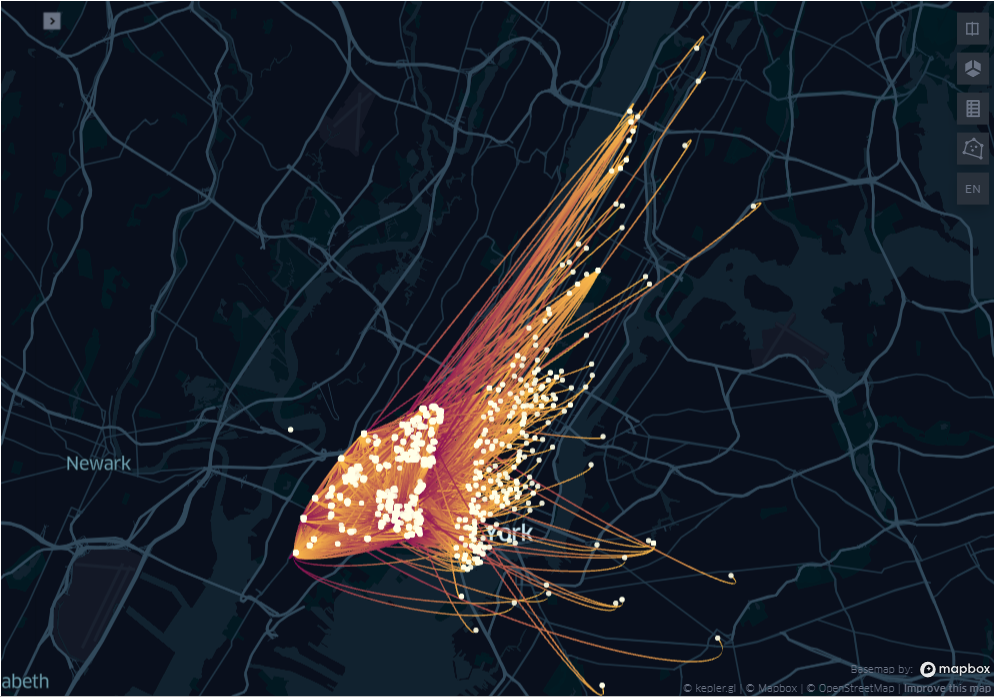

In [14]:
df_group

,start_station_name,start_lat,start_lng,end_station_name,end_lat,end_lng,trips
0,11 St & Washington St,40.747251,-74.027879,11 St & Washington St,40.749985,-74.027150,1
1,11 St & Washington St,40.747251,-74.027879,12 St & Sinatra Dr N,40.750604,-74.024020,1
2,11 St & Washington St,40.749625,-74.027652,Hoboken Terminal - Hudson St & Hudson Pl,40.735938,-74.030305,1
3,11 St & Washington St,40.749716,-74.027232,Church Sq Park - 5 St & Park Ave,40.742659,-74.032233,1
4,11 St & Washington St,40.749737,-74.027317,Willow Ave & 12 St,40.751867,-74.030377,1
...,...,...,...,...,...,...,...
120346,York St & Marin Blvd,40.716685,-74.042279,Monmouth and 6th,40.725685,-74.048790,1
120347,York St & Marin Blvd,40.716688,-74.042346,Communipaw & Berry Lane,40.714358,-74.066611,1
120348,York St & Marin Blvd,40.716698,-74.042366,McGinley Square,40.725340,-74.067622,1
120349,York St & Marin Blvd,40.716705,-74.042293,Communipaw & Berry Lane,40.714358,-74.066611,1


In [17]:
df_group.to_csv('df_group_for_map.csv')

### Map was created on the official kepler website since I cannot get it to work correctly through JupyterLab/Notebook